# Explore here

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos fisológicos de sus clientes cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. Indice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numerico)

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Your code here
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

Exploracion

In [4]:
total_data.shape

(1338, 7)

The DataFrame contains 1338 records (rows) and 7 variables (columns).

In [5]:

# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay nulos en esta dataset

In [7]:
duplicados=total_data.duplicated().sum()
duplicados

1

tenemos 1 duplicado procedemos eliminarlo

In [8]:
total_data_sinduplicados = total_data.drop_duplicates()
total_data_sinduplicados 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
total_data_sinduplicados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

esta comprobada la eliminacion

las variables categoricas transformamos en numericas

In [10]:
#factorize
total_data_sinduplicados["sex_n"] = pd.factorize(total_data_sinduplicados["sex"])[0]
total_data_sinduplicados["smoker_n"] = pd.factorize(total_data_sinduplicados["smoker"])[0]
total_data_sinduplicados["region_n"] = pd.factorize(total_data_sinduplicados["region"])[0]
total_data_sinduplicados.head()

/tmp/ipykernel_10500/3472470405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados["sex_n"] = pd.factorize(total_data_sinduplicados["sex"])[0]
/tmp/ipykernel_10500/3472470405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados["smoker_n"] = pd.factorize(total_data_sinduplicados["smoker"])[0]
/tmp/ipykernel_10500/3472470405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


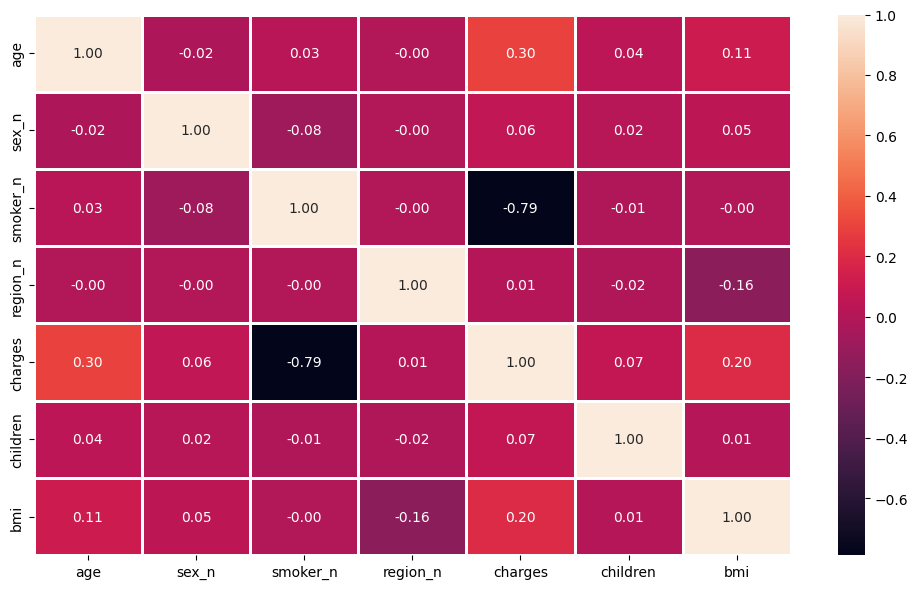

In [11]:
#correlacion

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_sinduplicados[['age','sex_n', 'smoker_n', 'region_n', 'charges', 'children', 'bmi']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()

As this correlation shows:

- the charges and smoke tienen relacion Negativa totalmente, significa los clientes fumadores tienen la contribucion muy alta en seguro.
- charges and age tiene relacion , con mas edad pagas mas.
- the bmi and charge tambien se relacionan.Masa corporal y pago seguro .
- la religion no tiene ninguna relacion con nada. Lo voy eliminar.

In [16]:
total_data_sinduplicados 

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,16884.92400,0,0,0
1,18,male,33.770,1,no,1725.55230,1,1,1
2,28,male,33.000,3,no,4449.46200,1,1,1
3,33,male,22.705,0,no,21984.47061,1,1,2
4,32,male,28.880,0,no,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1,2
1334,18,female,31.920,0,no,2205.98080,0,1,3
1335,18,female,36.850,0,no,1629.83350,0,1,1
1336,21,female,25.800,0,no,2007.94500,0,1,0


In [15]:
# Check if the column 'religion' exists in the DataFrame
if 'religion' in total_data_sinduplicados.columns:
    # Drop the 'religion' column
    total_data_sinduplicados.drop(['region_n'], axis=1, inplace=True)
    # Print the first few rows to verify changes
    print(total_data_sinduplicados.head())
else:
    print("'region_n' column does not exist in the DataFrame.")

'region_n' column does not exist in the DataFrame.


In [13]:
total_data_sinduplicados.drop([ 'region'], axis = 1, inplace = True)
total_data_sinduplicados.head()

/tmp/ipykernel_10500/1585383714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados.drop([ 'region'], axis = 1, inplace = True)


,age,sex,bmi,children,smoker,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,16884.92400,0,0,0
1,18,male,33.770,1,no,1725.55230,1,1,1
2,28,male,33.000,3,no,4449.46200,1,1,1
3,33,male,22.705,0,no,21984.47061,1,1,2
4,32,male,28.880,0,no,3866.85520,1,1,2


In [17]:
total_data_sinduplicados.to_csv("../data/raw/total_data_sinduplicados.csv", index = False)

In [18]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler


num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data_sinduplicados[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data_sinduplicados.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [ ]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0


In [ ]:
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.586957,0.247915,0.4,1.0
1,0.391304,0.378262,0.0,1.0
2,1.000000,0.293920,0.0,0.0
3,0.608696,0.263250,0.6,1.0
4,0.021739,0.429379,0.0,0.0


In [ ]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Linear Regression model

In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.608696,0.107345,0.4,1.0,0.128845
1,0.630435,0.224913,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,1.0,0.414952
3,0.456522,0.493947,1.0,1.0,0.119316
4,0.782609,0.148238,0.6,1.0,0.181225


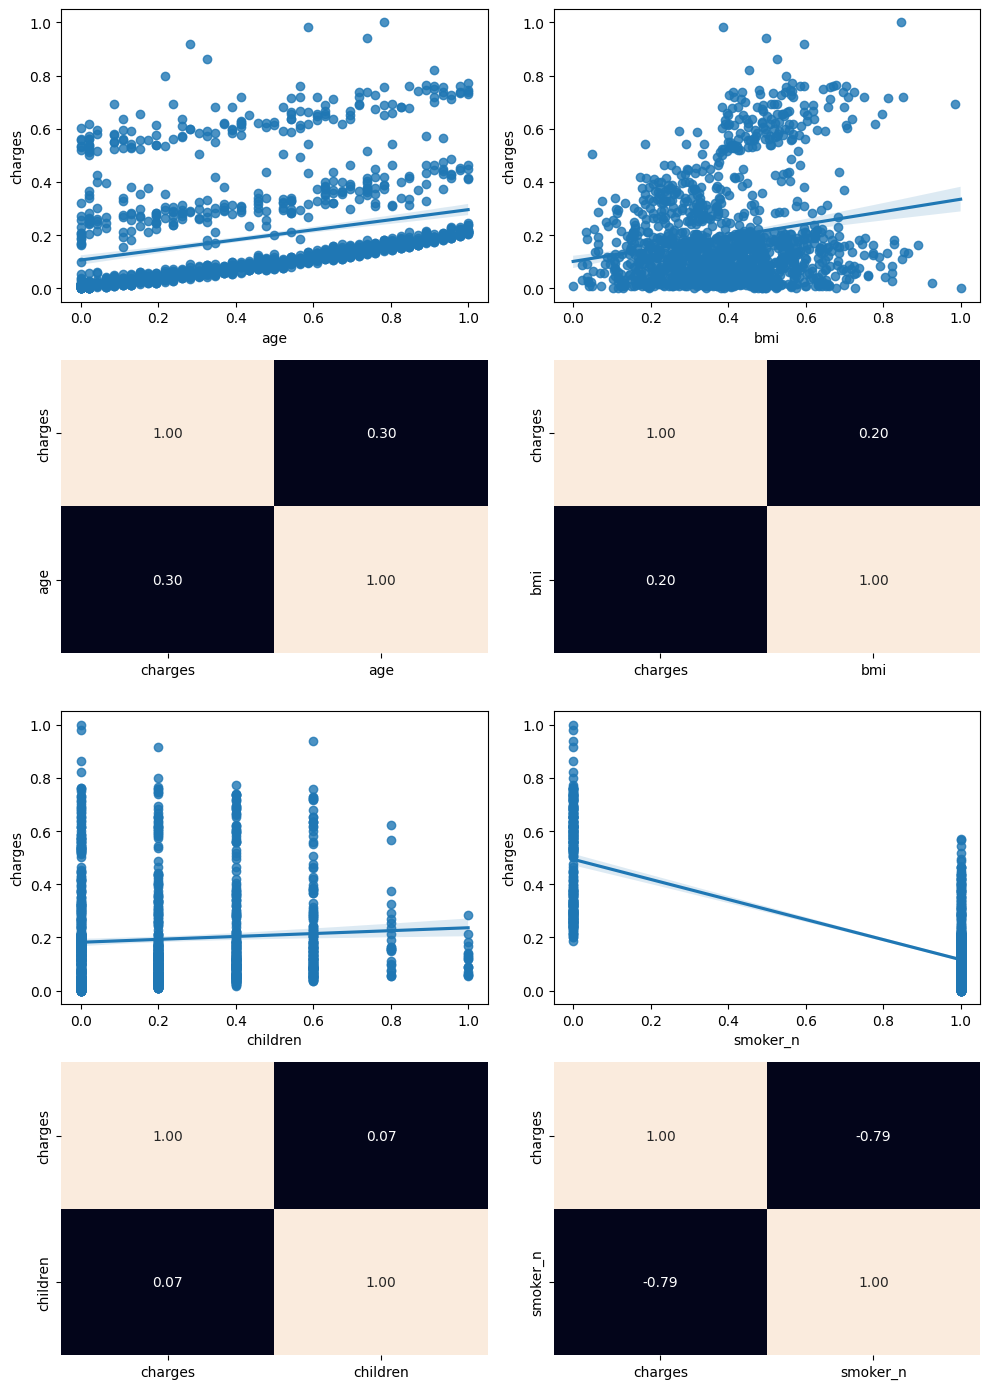

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3235318834651257
Coefficients (b1, b2): [ 0.18875573  0.19432238  0.03409496 -0.37755399]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 1.18582710e-01,  9.33436083e-02,  5.69402809e-01,  1.32485010e-01,
        4.11073127e-01,  1.59291645e-01, -1.56496019e-02,  2.49460673e-01,
       -6.03509954e-03,  1.60191438e-01,  4.37353262e-01,  1.30478442e-01,
        6.91908902e-02,  5.96848879e-01,  6.26363350e-01,  5.76306011e-01,
        2.26511271e-01,  5.57410487e-01,  1.30897419e-01,  4.83231717e-01,
        5.03063599e-02,  1.49193364e-01,  2.55726734e-02,  8.70515674e-02,
        1.61314900e-01,  1.81110854e-01,  2.18382771e-01,  7.88567312e-02,
        1.34239289e-01,  2.01100247e-02,  1.33269003e-01,  1.88951125e-01,
        5.71483179e-02,  3.65349560e-02,  5.90241880e-02,  1.81429430e-01,
        1.96866918e-02,  1.28258945e-01,  5.12578214e-01,  5.04797300e-01,
        5.02573471e-02,  4.96683603e-02,  2.12447777e-01,  1.63882083e-01,
        1.24627509e-01,  1.81366064e-01,  6.43036607e-02,  3.87595509e-02,
        5.51184491e-01,  1.30222489e-01,  2.36966450e-01,  2.29035057e-02,
        1.76174612e-01, -

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.008658096232451859
R2 Score: 0.7811147722517886
